In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import pickle

In [2]:
import colors

In [3]:
import seaborn
seaborn.set_style('whitegrid')
seaborn.set_context("paper", font_scale=2)

In [4]:
#explorations = pandas.read_csv('/home/mteruel/edm/results/dkt_lstm/by_problem_id/classifier_explorations.tsv', sep='\t')
explorations = pandas.read_csv('~/edm/results/dkt_classifier_explorations.tsv', sep='\t')
explorations = explorations.replace({'norm-fixed': 'norm'})
explorations[:3]

,Experiment,Classifier,Distance,MaxSteps,LSTMUnits,Dropout,BatchSize,EmbeddingSize,Pretrained,Finetuned,AUC,RMSE,Accuracy,R2,OverfittingScore
0,19-05-19-22-39,LSTM,None,300,50,0.3,30,None,No,NaN,0.693,0.457,0.682,0.077,NaN
1,19-05-20-02-25,LSTM,None,30,30,0.3,50,None,No,NaN,0.715,0.449,0.696,0.092,NaN
2,19-05-20-04-14,LSTM,None,50,30,0.1,50,None,No,NaN,0.719,0.448,0.698,0.103,NaN


In [5]:
explorations['ModelType'] = explorations[['Classifier', 'Distance']].apply(
    lambda x: x[0] + ('-' + x[1].split('-')[-1] if x[1] != 'None' else ''), axis=1)

In [6]:
explorations.Distance.unique()

array(['None', 'co-abs', 'co-square', 'norm', 'co-tanh', 'co-sigm'],
      dtype=object)

In [6]:
model_pal = {mtype: colors.dark_green for mtype in explorations.ModelType.unique()}
model_pal['LSTM'] = colors.red
model_pal['E-LSTM'] = colors.dark_blue

In [7]:
classifier_pal = {
    'LSTM': colors.red,
    'E-LSTM': colors.dark_blue,
    'Co-ELSTM': colors.dark_green
}

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.6, 0.8)

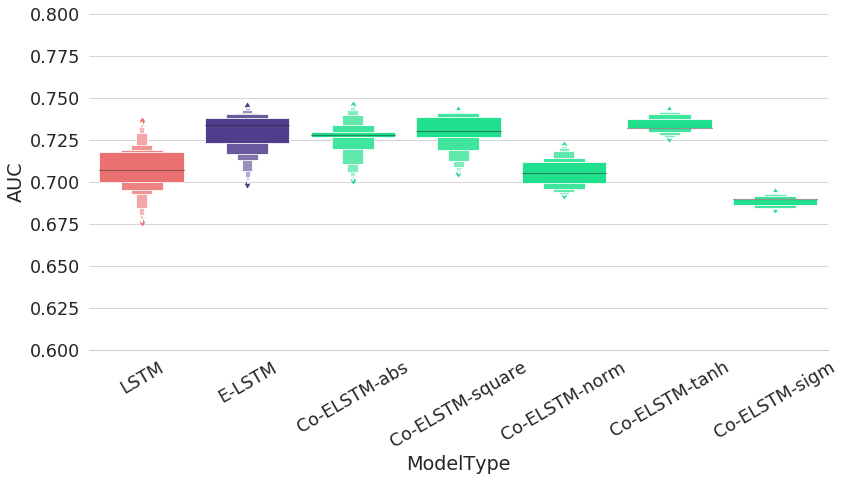

In [8]:
g = seaborn.factorplot(
    data=explorations[explorations.Pretrained == 'No'], x='ModelType', y='AUC', kind='boxen', # hue='Pretrained',
    palette=model_pal,
    size=6, aspect=2)
g.set_xticklabels(rotation=30)
seaborn.despine(left=True)
plt.ylim((0.6, 0.8))

In [9]:
explorations['CE Embedding'] = explorations[['Pretrained', 'Finetuned']].apply(
    lambda x: ('Pretrained' + ('+Finetuned' if x[1] == 'Yes' else '')) if x[0] == 'Yes' else 'Random', axis=1)

In [10]:
hue_order_pretrained = ['Random', 'Pretrained', 'Pretrained+Finetuned']
pretrained_pal = {
    hue_order_pretrained[0]: colors.red,
    hue_order_pretrained[1]: colors.dark_green,
    hue_order_pretrained[2]: colors.purple,
}

(0.6, 0.8)

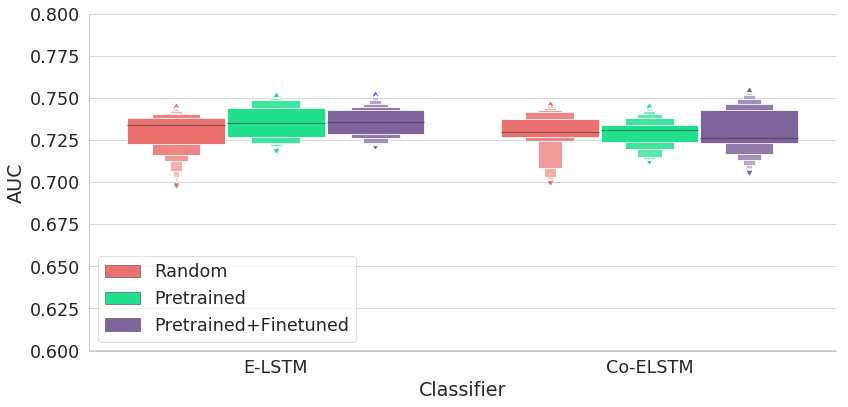

In [12]:
g = seaborn.catplot(
    data=explorations[
        explorations.Distance.isin(['co-abs', 'co-square', 'co-tanh', 'None']) &
        (explorations.Classifier != 'LSTM')
    ],
    x='Classifier', y='AUC', kind='boxen', hue='CE Embedding',
    palette=pretrained_pal, hue_order=hue_order_pretrained,
    legend=False,
    height=6, aspect=2)
#g.set_xticklabels(rotation=30)
plt.legend(loc='lower left')
plt.ylim((0.6, 0.8))

(0.6, 0.8)

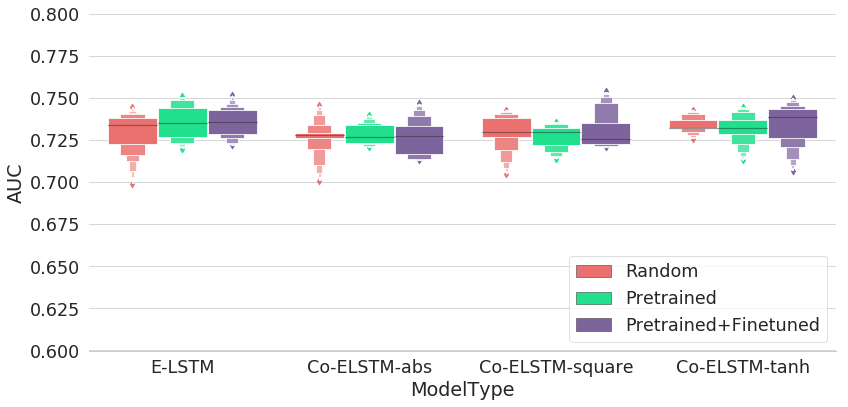

In [13]:
g = seaborn.catplot(
    data=explorations[
        explorations.Distance.isin(['co-abs', 'co-square', 'co-tanh', 'None']) &
        (explorations.Classifier != 'LSTM')
    ],
    x='ModelType', sharex=False,
    y='AUC', kind='boxen', hue='CE Embedding',
    palette=pretrained_pal, hue_order=hue_order_pretrained,
    legend=False,
    height=6, aspect=2)
#g.set_xticklabels(rotation=30)
plt.legend(loc='lower right')
seaborn.despine(left=True)
plt.ylim((0.6, 0.8))

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


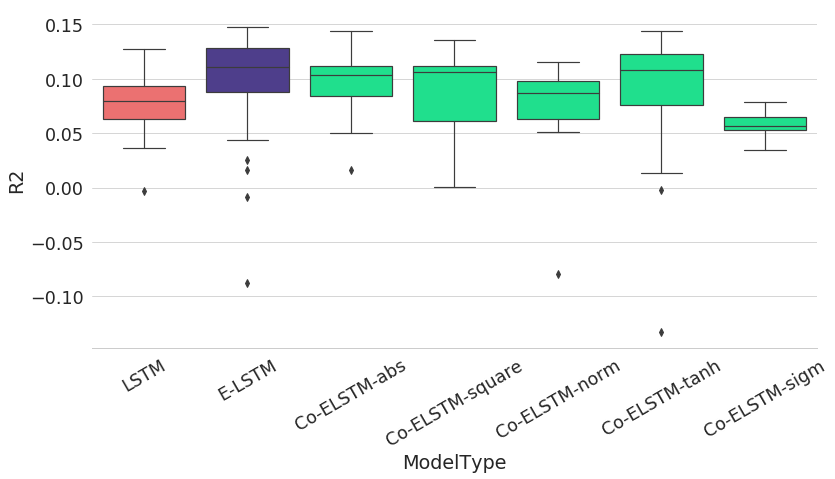

In [14]:
g = seaborn.factorplot(
    data=explorations, x='ModelType', y='R2', kind='box', # hue='Pretrained',
    palette=model_pal,
    size=6, aspect=2)
seaborn.despine(left=True)
g.set_xticklabels(rotation=30)

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


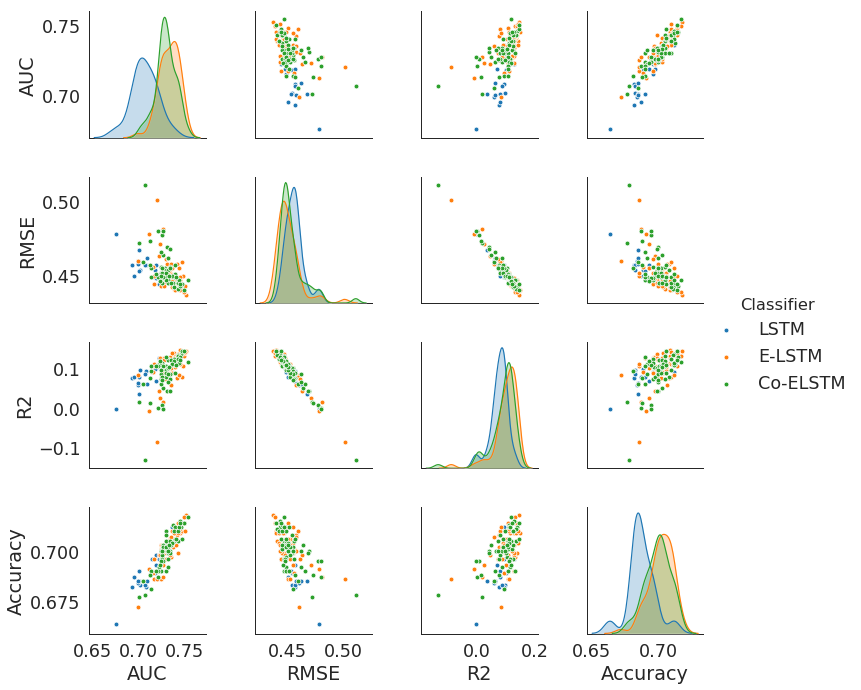

In [21]:
seaborn.pairplot(data=good_explorations, hue='Classifier',
                 vars=['AUC', 'RMSE', 'R2', 'Accuracy'])

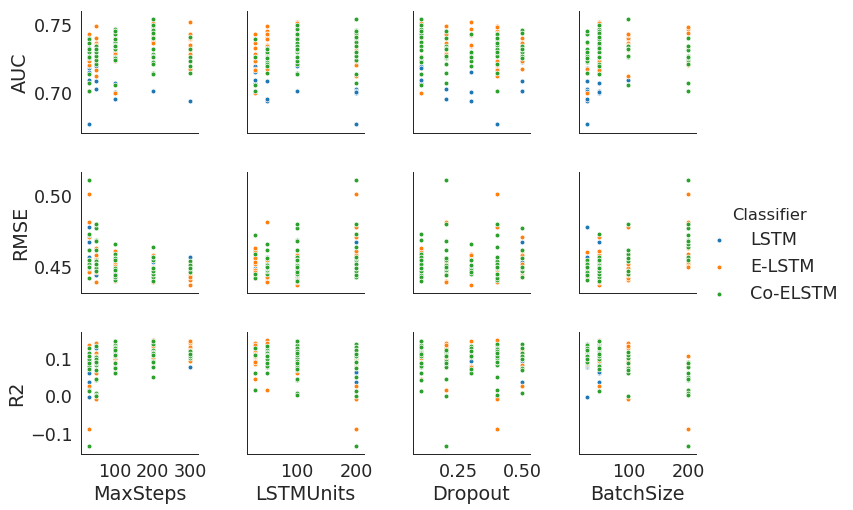

In [20]:
seaborn.pairplot(data=good_explorations, x_vars=['MaxSteps', 'LSTMUnits', 'Dropout', 'BatchSize'],
                 y_vars=['AUC', 'RMSE', 'R2'], hue='Classifier')

In [12]:
good_explorations = explorations[
    explorations.Distance.isin(['co-abs', 'co-square', 'co-tanh', 'None'])]

In [13]:
good_explorations_long = good_explorations.melt(
    id_vars=['Experiment', 'Classifier', 'AUC', 'Pretrained', 'Finetuned'],
    value_vars=['Distance', 'MaxSteps', 'LSTMUnits', 'Dropout', 'BatchSize', 'EmbeddingSize'],
    var_name='Hyperparameter', value_name='Value')
good_explorations_long[:3]

,Experiment,Classifier,AUC,Pretrained,Finetuned,Hyperparameter,Value
0,19-05-19-22-39,LSTM,0.693,No,NaN,Distance,None
1,19-05-20-02-25,LSTM,0.715,No,NaN,Distance,None
2,19-05-20-04-14,LSTM,0.719,No,NaN,Distance,None


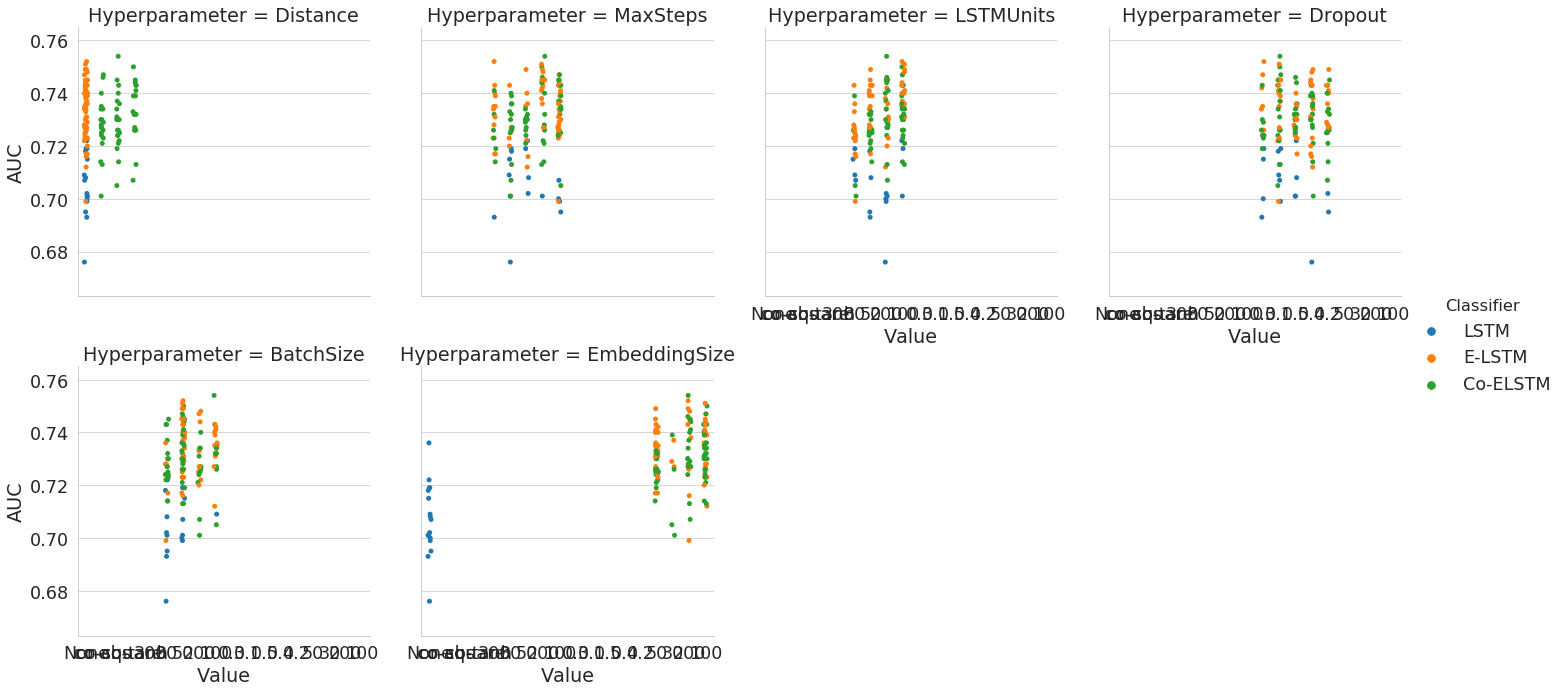

In [45]:
seaborn.catplot(data=good_explorations_long, y='AUC', col='Hyperparameter', x='Value', col_wrap=4, hue='Classifier')

In [52]:
def plot_correlation(rows, cols, metric='AUC'):
    matrix = pandas.crosstab(index=good_explorations[rows],
                             columns=good_explorations[cols],
                             values=good_explorations[metric], aggfunc=numpy.average)
    seaborn.heatmap(data=matrix, annot=True)
    plt.title('Average {} performance'.format(metric))

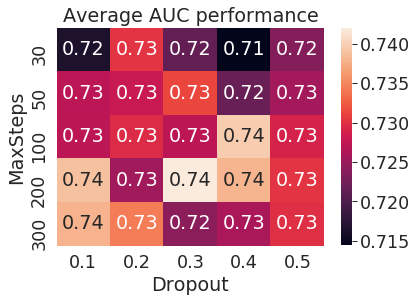

In [53]:
plot_correlation('MaxSteps', 'Dropout')

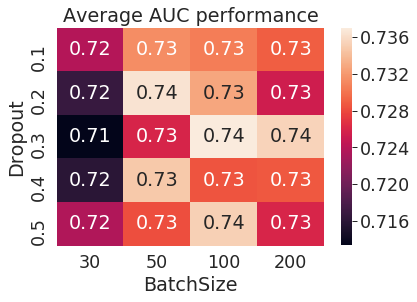

In [54]:
plot_correlation('Dropout', 'BatchSize')

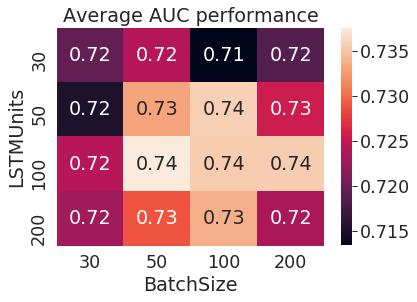

In [30]:
plot_correlation('LSTMUnits', 'BatchSize')

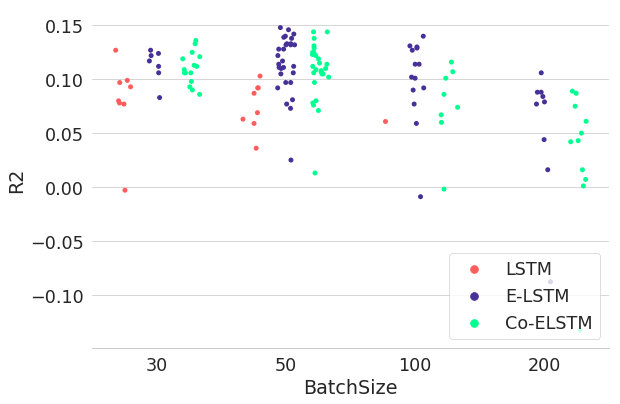

In [56]:
seaborn.catplot(data=good_explorations, col_order=['E-LSTM', 'Co-ELSTM'],
                x='BatchSize', y='R2',
                kind='strip', hue='Classifier',
                ci='sd', dodge=True,
                height=6, aspect=1.5, palette=classifier_pal, edgecolor='black', jitter=0.2,
                legend=False)
seaborn.despine(left=True)
plt.legend(loc='lower right')
#plt.ylim((0.6, 0.8))

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.6, 0.8)

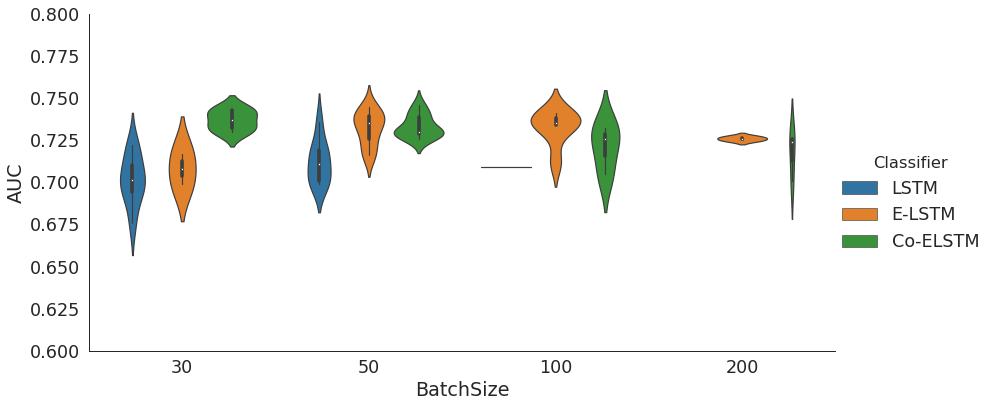

In [64]:
seaborn.factorplot(data=good_explorations, x='BatchSize', y='AUC', kind='violin', hue='Classifier', aspect=2, size=6)
plt.ylim((0.6, 0.8))

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.6, 0.8)

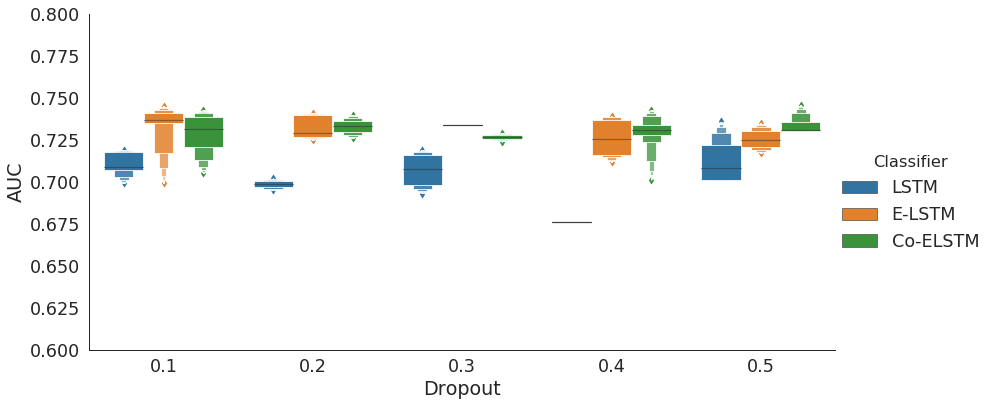

In [66]:
seaborn.factorplot(data=good_explorations, x='Dropout', y='AUC', kind='boxen', hue='Classifier', aspect=2, size=6)
plt.ylim((0.6, 0.8))

---

# Most important hyperparameter

In [14]:
import sklearn
sklearn.__version__

'0.21.2'

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
numeric_features = ['Dropout', 'MaxSteps']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_features = ['Distance', 'Classifier']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

X = good_explorations[numeric_features + categorical_features]
y = good_explorations['AUC'].values

In [24]:
X_train[:10]

,Dropout,MaxSteps,Distance,Classifier
86,0.5,100,None,E-LSTM
139,0.3,100,None,E-LSTM
94,0.2,100,co-abs,Co-ELSTM
61,0.2,200,co-tanh,Co-ELSTM
110,0.3,100,co-tanh,Co-ELSTM
35,0.4,50,None,E-LSTM
159,0.2,30,co-tanh,Co-ELSTM
25,0.3,300,None,E-LSTM
109,0.1,30,co-tanh,Co-ELSTM
15,0.3,100,None,LSTM


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.382


In [41]:
clf.get_params()

{'classifier': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'classifier__copy_X': True,
 'classifier__fit_intercept': True,
 'classifier__n_jobs': None,
 'classifier__normalize': False,
 'memory': None,
 'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('num',
                                  Pipeline(memory=None,
                                           steps=[('scaler',
                                                   StandardScaler(copy=True,
                                                                  with_mean=True,
                                                                  with_std=True))],
                                           verbose=False),
                                  ['Dropout', 'MaxSteps']),
                                 ('cat',
                                  Pipeline(memory=None,
          